Have weird Ca/Ni ratios?

In [1]:
# Third-party
import astropy.coordinates as coord
from astropy.table import Table
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
tbl = Table.read('/Users/adrian/data/APOGEE_DR15beta/allStar-r10-l31c-58297.fits')

In [33]:
mask = ((tbl['NI_FE'] > -9) & (tbl['CA_FE'] > -9) & (tbl['MG_FE'] > -9) & 
        (tbl['TEFF'] < 4000) & (tbl['TEFF'] > 3000) &
        (tbl['LOGG'] < 0.5) & (tbl['LOGG'] > -0.5))

In [34]:
ca_h = (tbl['CA_FE'] - tbl['FE_H'])[mask]
ni_h = (tbl['NI_FE'] - tbl['FE_H'])[mask]
mg_h = (tbl['MG_FE'] - tbl['FE_H'])[mask]

ca_h_err = np.sqrt(tbl['CA_FE_ERR']**2 + tbl['FE_H_ERR']**2)[mask]
ni_h_err = np.sqrt(tbl['NI_FE_ERR']**2 + tbl['FE_H_ERR']**2)[mask]
mg_h_err = np.sqrt(tbl['MG_FE_ERR']**2 + tbl['FE_H_ERR']**2)[mask]

mg_ca = (tbl['CA_FE'] - tbl['MG_FE'])[mask]
mg_ca_err = np.sqrt(tbl['MG_FE_ERR']**2 + tbl['CA_FE_ERR']**2)[mask]

(-1, 1)

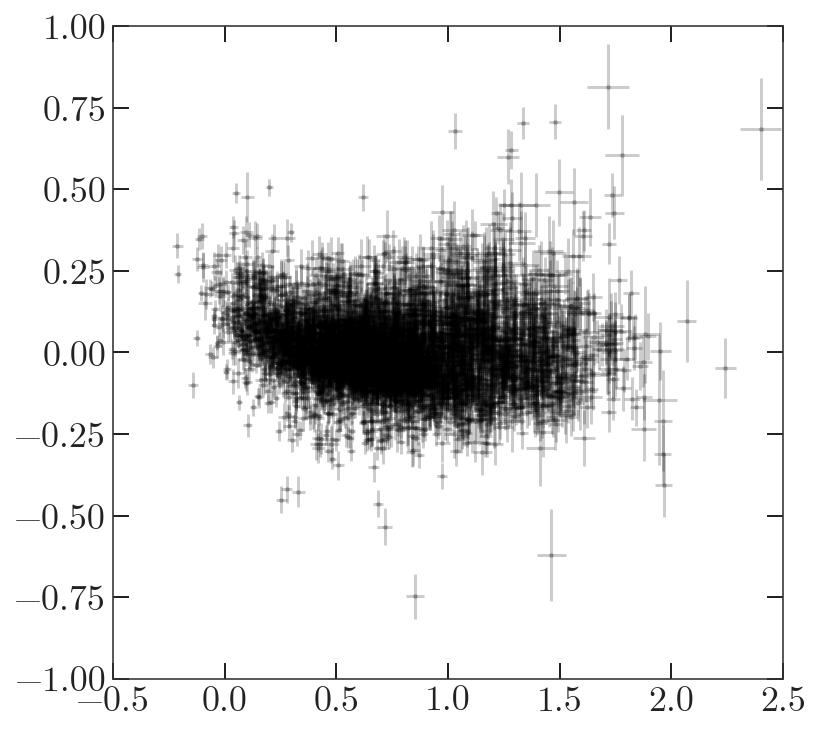

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.errorbar(ni_h, mg_ca, 
            xerr=ni_h_err, yerr=mg_ca_err,
            marker='.', ls='none', color='k', alpha=0.2)
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-1, 1)

(-1, 3)

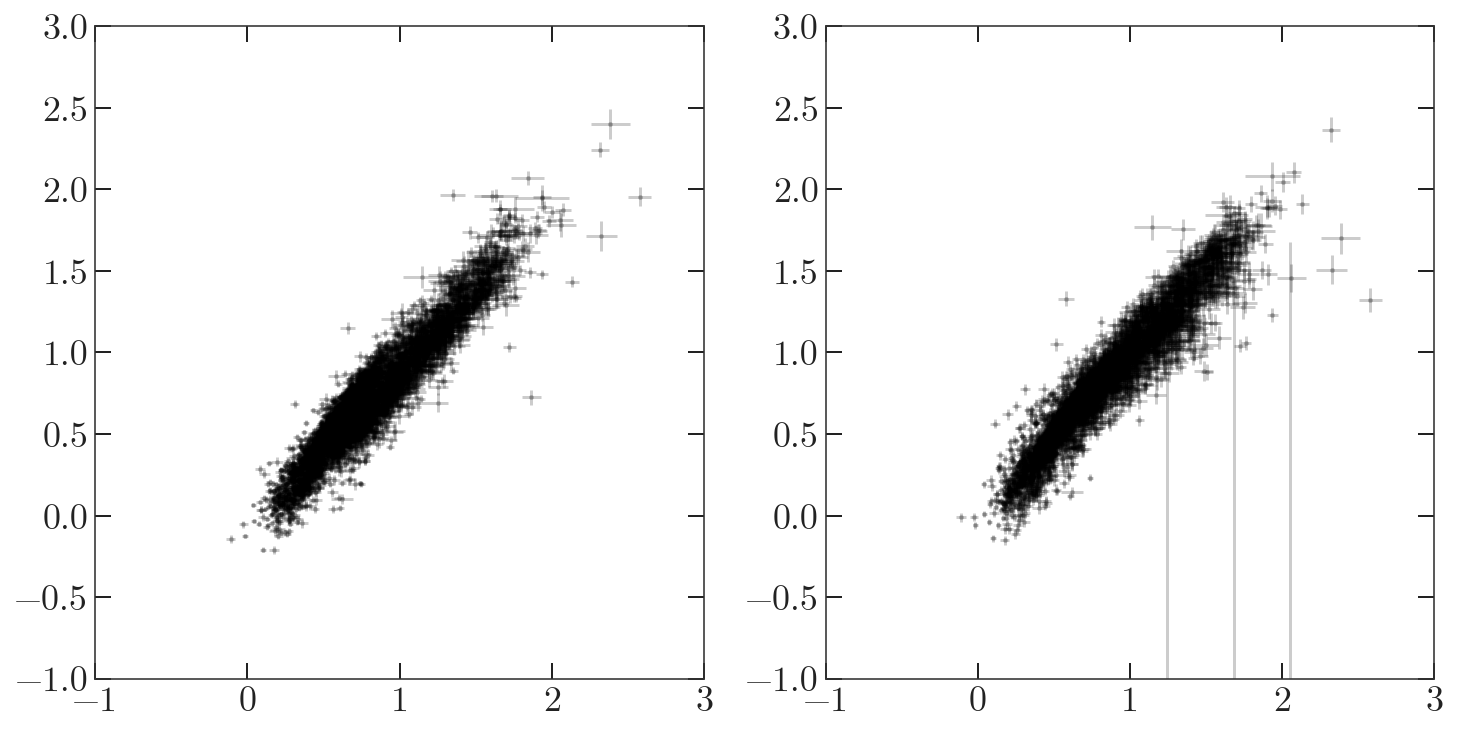

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ax = axes[0]
ax.errorbar(ca_h, ni_h, 
            xerr=ca_h_err, yerr=ni_h_err,
            marker='.', ls='none', color='k', alpha=0.2)
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 3)

ax = axes[1]
ax.errorbar(ca_h, mg_h, 
            xerr=ca_h_err, yerr=mg_h_err,
            marker='.', ls='none', color='k', alpha=0.2)
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 3)